# Stats sur 5 ans

In [100]:
# Répertoire du fichier en local
CT_DIR_DATA = 'C:/Users/Mscao/OneDrive - INTESCIA/export/'
CT_DIR_SAVE = 'docs/images/'

from datetime import datetime, timedelta
DTREF = datetime(2018,4,1)

## Chargement

In [2]:
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from time import time

In [50]:
# Lecture
df = pd.read_csv(CT_DIR_DATA + 'stats_5_ans_PROD.csv', sep=";", na_values=r"\0")
print(df.shape)
print(len(set(df.siren)), 'SIREN')

y0 = str(DTREF.year)
df = df.rename(columns={'indiScore': 'indiScore'+y0, 'procol': 'procol'+y0, 'indiScoreDate': 'indiScoreDate'+y0})
y1 = str(DTREF.year-1)
df = df.rename(columns={'indiScoreMoins1': 'indiScore'+y1, 'procolMoins1': 'procol'+y1, 'indiScoreDateMoins1': 'indiScoreDate'+y1})
y2 = str(DTREF.year-2)
df = df.rename(columns={'indiScoreMoins2': 'indiScore'+y2, 'procolMoins2': 'procol'+y2, 'indiScoreDateMoins2': 'indiScoreDate'+y2})
y3 = str(DTREF.year-3)
df = df.rename(columns={'indiScoreMoins3': 'indiScore'+y3, 'procolMoins3': 'procol'+y3, 'indiScoreDateMoins3': 'indiScoreDate'+y3})
y4 = str(DTREF.year-4)
df = df.rename(columns={'indiScoreMoins4': 'indiScore'+y4, 'procolMoins4': 'procol'+y4, 'indiScoreDateMoins4': 'indiScoreDate'+y4})

#df[['indiScore'+y1, 'indiScore'+y2, 'indiScore'+y3, 'indiScore'+y4]] = df[['indiScore'+y1, 'indiScore'+y2, 'indiScore'+y3, 'indiScore'+y4]].astype(np.int64)

display(df.head(10))
df.describe()

C:\Users\Mscao\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (1,4,6,7,9,10,12,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(10983794, 18)
10983794 SIREN


,siren,procol2018,indiScore2018,indiScoreDate2018,procol2017,indiScore2017,indiScoreDate2017,procol2016,indiScore2016,indiScoreDate2016,procol2015,indiScore2015,indiScoreDate2015,procol2014,indiScore2014,indiScoreDate2014,lastTypeEven,lastTypeEven2
0,126,NaN,0,2016-06-13,NaN,0.0,2016-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,491,NaN,0,2016-08-25,NaN,0.0,2016-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,512,NaN,0,2015-09-01,NaN,0.0,2015-09-01,NaN,0.0,2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,765,NaN,0,2015-09-02,NaN,0.0,2015-09-02,NaN,0.0,2015-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,891,NaN,0,2015-03-24,NaN,0.0,2015-03-24,NaN,0.0,2015-03-24,NaN,0.0,2015-03-24,NaN,NaN,NaN,NaN,NaN
5,1008,NaN,6,2018-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1601,NaN
6,1024,NaN,6,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1601,NaN
7,1057,NaN,6,2018-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1600,NaN
8,1156,NaN,6,2017-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1600,NaN
9,1234,NaN,0,2016-09-12,NaN,0.0,2016-09-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,siren,indiScore2018,indiScore2017,indiScore2016,indiScore2015,indiScore2014
count,1.098379e+07,1.098379e+07,3.375475e+06,1.553711e+06,959036.000000,752418.000000
mean,5.704403e+08,1.038424e+01,8.266582e+00,8.248618e+00,7.818936,7.850648
std,1.883944e+08,4.693638e+00,5.201530e+00,5.393721e+00,5.822663,5.809188
min,1.260000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,4.228314e+08,8.000000e+00,4.000000e+00,3.000000e+00,0.000000,0.000000
50%,5.081340e+08,1.200000e+01,1.000000e+01,1.000000e+01,9.000000,9.000000
75%,8.006354e+08,1.400000e+01,1.200000e+01,1.200000e+01,13.000000,13.000000
max,1.000000e+09,1.900000e+01,1.900000e+01,1.900000e+01,19.000000,19.000000


In [115]:
print('Scores définis en 2018 :', len(df[df['indiScore2018'].notnull()]), ', dont à 0 :', len(df[df['indiScore2018']==0]))
print('Scores définis en 2017 :', len(df[df['indiScore2017'].notnull()]), ', dont à 0 :', len(df[df['indiScore2017']==0]))
print('Scores définis en 2016 :', len(df[df['indiScore2016'].notnull()]), ', dont à 0 :', len(df[df['indiScore2016']==0]))
print('Scores définis en 2015 :', len(df[df['indiScore2015'].notnull()]), ', dont à 0 :', len(df[df['indiScore2015']==0]))
print('Scores définis en 2014 :', len(df[df['indiScore2014'].notnull()]), ', dont à 0 :', len(df[df['indiScore2014']==0]))

Scores définis en 2018 : 10983794 , dont à 0 : 1310104
Scores définis en 2017 : 3375475 , dont à 0 : 720858
Scores définis en 2016 : 1553711 , dont à 0 : 341904
Scores définis en 2015 : 959036 , dont à 0 : 260602
Scores définis en 2014 : 752418 , dont à 0 : 200007


In [116]:
tmp = df[['indiScore2018', 'indiScore2017', 'indiScore2016', 'indiScore2015', 'indiScore2014']]
tab_info=pd.DataFrame(tmp.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(tmp.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(tmp.isnull().sum()/tmp.shape[0]*100).T.rename(index={0:'null values (%)'}))
display(tab_info)

,indiScore2018,indiScore2017,indiScore2016,indiScore2015,indiScore2014
column type,int64,float64,float64,float64,float64
null values (nb),0,7608319,9430083,10024758,10231376
null values (%),0,69.2686,85.8545,91.2686,93.1497


In [51]:
# Concaténation des codes évènements
df['lastTypeEven'].fillna('', inplace=True)
df['lastTypeEven2'].fillna('', inplace=True)

df['lastTypeEvents'] = df['lastTypeEven'] +';'+ df['lastTypeEven2']
#display(df.tail())

,siren,procol2018,indiScore2018,indiScoreDate2018,procol2017,indiScore2017,indiScoreDate2017,procol2016,indiScore2016,indiScoreDate2016,procol2015,indiScore2015,indiScoreDate2015,procol2014,indiScore2014,indiScoreDate2014,lastTypeEven,lastTypeEven2,lastTypeEvents
10983694,998724405,NaN,5,2016-05-18,NaN,5.0,2016-05-18,NaN,8.0,2014-04-07,NaN,8.0,2014-04-07,NaN,5.0,2013-12-14,3200,,3200;
10983695,998724504,NaN,16,2018-03-18,A,16.0,2014-12-14,A,16.0,2014-12-14,A,16.0,2014-12-14,A,16.0,2014-01-16,2315,2885,2315;2885
10983696,998744304,NaN,10,2018-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,;
10983697,998754105,R,0,2017-02-28,RR,0.0,2017-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5503;5900;2726,5700;5900;2726,3200,6700","2315,2315","5503;5900;2726,5700;5900;2726,3200,6700;2315,2315"
10983698,998754303,NaN,9,2017-09-01,NaN,10.0,2016-08-03,NaN,12.0,2015-08-07,NaN,10.0,2014-11-21,NaN,13.0,2013-10-23,3200,,3200;
10983699,998754600,RR,0,2018-04-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6700,,6700;
10983700,998764807,NaN,15,2017-09-01,NaN,15.0,2016-08-02,NaN,15.0,2015-12-05,NaN,16.0,2014-08-07,NaN,16.0,2013-08-25,3200,2301,3200;2301
10983701,998774103,P,8,2017-12-21,P,0.0,2016-06-08,NaN,9.0,2014-07-04,NaN,9.0,2014-07-04,NaN,7.0,2013-06-29,"3200,1204,2901;2900,1101","1101,1101,1500","3200,1204,2901;2900,1101;1101,1101,1500"
10983702,998784003,R,0,2013-09-20,RP,0.0,2013-09-20,RP,0.0,2013-09-20,RP,0.0,2013-09-20,RP,0.0,2013-09-20,,,;
10983703,998794309,NaN,12,2018-03-28,NaN,13.0,2016-07-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3200,"2301,2315","3200;2301,2315"


## Scores actuels

,indiScore2018,siren
0,0,1310104
1,1,3710
2,2,23970
3,3,101215
4,4,82812
5,5,70120
6,6,308827
7,7,95050
8,8,788281
9,9,155683


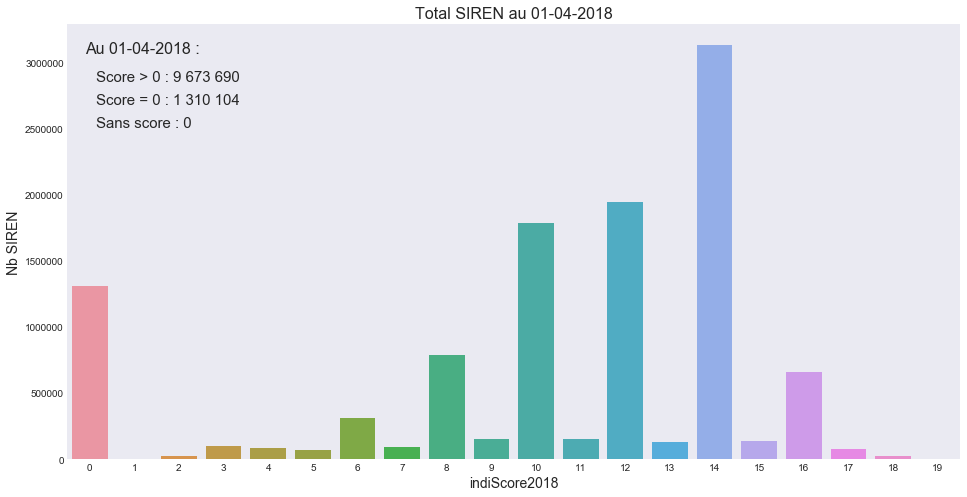

In [102]:
myTitre = 'Total SIREN au ' + DTREF.strftime('%d-%m-%Y')
col1 = 'indiScore' + str(DTREF.year)
n1 = '{:,}'.format(len(df[df[col1]>0])).replace(',', ' ')
n2 = '{:,}'.format(len(df[df[col1]==0])).replace(',', ' ')
n3 = '{:,}'.format(len(df[df[col1].isnull()])).replace(',', ' ')

stats = df[df[col1].notnull()].groupby(col1)['siren'].aggregate('count').reset_index().sort_values(col1, ascending=True)
stats[col1] = stats[col1].astype('int64')
display(stats)

fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(stats[col1], stats.siren)
plt.title(myTitre, fontsize=16)
plt.xlabel(col1, fontsize=14)
plt.ylabel('Nb SIREN', fontsize=14)
sns.set_style('dark')
fig.text(.14, .85, 'Au '+DTREF.strftime('%d-%m-%Y')+' :', ha='left', va='top', size=16)
fig.text(.15, .80, 'Score > 0 : '+n1, ha='left', va='top', size=15)
fig.text(.15, .76, 'Score = 0 : '+n2, ha='left', va='top', size=15)
fig.text(.15, .72, 'Sans score : '+n3, ha='left', va='top', size=15)
plt.show()
fig.savefig(CT_DIR_SAVE + myTitre + '.png')

## Historique des SIREN tombés à 0

In [ ]:
# Outliers
def cleanOutliers(p_df):
    # On enlève les absorptions (procol A ou évènement de la liste)
    p_df = p_df[(p_df['procol']!='A')]
    p_df = p_df[~(p_df['lastTypeEvents'].str.contains('2620') | p_df['lastTypeEvents'].str.contains('2621') | 
          p_df['lastTypeEvents'].str.contains('2720') | p_df['lastTypeEvents'].str.contains('2725') | 
          p_df['lastTypeEvents'].str.contains('5700') | p_df['lastTypeEvents'].str.contains('5500') | 
          p_df['lastTypeEvents'].str.contains('5501') | p_df['lastTypeEvents'].str.contains('5502') | 
          p_df['lastTypeEvents'].str.contains('5503') | p_df['lastTypeEvents'].str.contains('5510'))]
    return p_df

In [103]:
def make_stats(p_df, p_annee, p_duree=1):
    dt0 = datetime(DTREF.year-p_annee, DTREF.month, DTREF.day)
    col0 = 'indiScore' + str(dt0.year)
    procol0 = 'procol' + str(dt0.year)
    dt1 = datetime(DTREF.year-p_annee-p_duree, DTREF.month, DTREF.day)
    col1 = 'indiScore' + str(dt1.year)

    myTitre = 'Total SIREN avec un score positif au ' + dt1.strftime('%d-%m-%Y')
    tmp = p_df[['siren', col1, col0, procol0, 'lastTypeEvents']]
    tmp = tmp[tmp[col1]>0]

    n1 = '{:,}'.format(len(tmp)).replace(',', ' ')
    n2 = '{:,}'.format(len(p_df[p_df[col1]==0])).replace(',', ' ')
    n3 = '{:,}'.format(len(p_df[p_df[col1].isnull()])).replace(',', ' ')
    
    print(n1, myTitre)
    print(n2, 'SIREN avec un score à 0 au ' + dt1.strftime('%d-%m-%Y'))
    print(n3, 'SIREN sans score au ' + dt1.strftime('%d-%m-%Y'))
    #display(tmp.head())
    
    stats = tmp.groupby(col1)['siren'].aggregate('count').reset_index().sort_values(col1, ascending=True)
    stats[col1] = stats[col1].astype('int64')
    #display(stats)
    
    # Graphique 1 : Stats globales
    if p_duree==1:
        fig, ax = plt.subplots(figsize=(16, 8))
        sns.barplot(stats[col1], stats.siren)
        plt.title(myTitre, fontsize=16)
        plt.xlabel(col1, fontsize=14)
        plt.ylabel('Nb SIREN', fontsize=14)
        sns.set_style('dark')
        fig.text(.14, .85, 'Au '+dt1.strftime('%d-%m-%Y')+' :', ha='left', va='top', size=16)
        fig.text(.15, .80, 'Score > 0 : '+n1, ha='left', va='top', size=15)
        fig.text(.15, .76, 'Score = 0 : '+n2, ha='left', va='top', size=15)
        fig.text(.15, .72, 'Sans score : '+n3, ha='left', va='top', size=15)
        plt.show()
        fig.savefig(CT_DIR_SAVE + myTitre + '.png')
    
    # Scores tombés à 0 mais pas en absorption
    myTitre += ' et un score à 0 au ' + dt0.strftime('%d-%m-%Y') + ' (hors absorption)'
    dfzero = tmp[(tmp[col0]==0)]
    n5 = '{:,}'.format(len(dfzero)).replace(',', ' ')
    # On enlève les absorptions (procol A ou évènement de la liste)
    dfzero = dfzero[(dfzero[procol0]!='A')]
    dfzero = dfzero[~(dfzero['lastTypeEvents'].str.contains('2620') | dfzero['lastTypeEvents'].str.contains('2621') | 
                      dfzero['lastTypeEvents'].str.contains('2720') | dfzero['lastTypeEvents'].str.contains('2725') | 
                      dfzero['lastTypeEvents'].str.contains('5700') | dfzero['lastTypeEvents'].str.contains('5500') | 
                      dfzero['lastTypeEvents'].str.contains('5501') | dfzero['lastTypeEvents'].str.contains('5502') | 
                      dfzero['lastTypeEvents'].str.contains('5503') | dfzero['lastTypeEvents'].str.contains('5510'))]

    n4 = '{:,}'.format(len(dfzero)).replace(',', ' ')
    print(n4, myTitre)
    
    statszero = dfzero.groupby(col1)['siren'].aggregate('count').reset_index().sort_values(col1, ascending=True)
    statszero = statszero.rename(columns = {'siren':'Nb défauts'})
    statszero[col1] = statszero[col1].astype('int64')

    # Pour comparer on regarde ici les scores à 0 absorptions comprises
    dfabs = tmp[(tmp[col0]==0)]
    statsabs = dfabs.groupby(col1)['siren'].aggregate('count').reset_index().sort_values(col1, ascending=True)
    statsabs = statsabs.rename(columns = {'siren':'Absorptions'})
    statsabs[col1] = statsabs[col1].astype('int64')
    
    # Graphique 2 : Siren tombés à 0
    fig, ax = plt.subplots(figsize=(16, 8))
    sns.barplot(statsabs[col1], statsabs['Absorptions'], color='k', label="Part des absorptions")
    sns.barplot(statszero[col1], statszero['Nb défauts'])
    plt.legend()
    plt.xlabel(col1, fontsize=14)
    plt.ylabel('Nb SIREN', fontsize=14)
    plt.title(myTitre, fontsize=16)
    fig.text(.14, .85, 'Total SIREN : '+n5, ha='left', va='top', size=16)
    fig.text(.14, .80, 'Total hors absorption : '+n4, ha='left', va='top', size=16)
    plt.show()
    fig.savefig(CT_DIR_SAVE + myTitre + '.png')

    stats = stats.merge(statszero)
    stats['pourcent'] = round(stats['Nb défauts'] / stats['siren'] * 100, 2)
    stats = stats.merge(statsabs)
    stats['pourcentabs'] = round(stats['Absorptions'] / stats['siren'] * 100, 2)
    display(stats)
    
    # Graphique 3 : Siren tombés à 0 - Pourcentage
    fig, ax = plt.subplots(figsize=(16, 8))
    sns.barplot(stats[col1], stats['pourcentabs'], color='k', label="Part des absorptions")
    sns.barplot(stats[col1], stats['pourcent'])
    plt.legend()
    plt.xlabel(col1, fontsize=14)
    plt.ylabel('Pourcentage', fontsize=14)
    plt.title(myTitre + ' - Pourcentage', fontsize=16)
    fig.text(.88, .81, 'Total SIREN : '+n5, ha='right', va='top', size=16)
    fig.text(.88, .76, 'Total hors absorption : '+n4, ha='right', va='top', size=16)
    plt.show()
    fig.savefig(CT_DIR_SAVE + myTitre + ' - Pourcentage' + '.png')
    
    if (p_annee==0 and p_duree==1):
        print('SIREN passés de 19 à 0 :')
        print(','.join(str(s) for s in dfzero[dfzero[col1]>=19].siren))
        print('SIREN passés de 18 à 0 :')
        print(','.join(str(s) for s in dfzero[dfzero[col1]==18].siren))
        print('SIREN passés de 17 à 0 :')
        print(','.join(str(s) for s in dfzero[dfzero[col1]==17].siren))
        print('SIREN passés de 16 à 0 :')
        print(','.join(str(s) for s in dfzero[dfzero[col1]==16].siren))


2 654 617 Total SIREN avec un score positif au 01-04-2017
720 858 SIREN avec un score à 0 au 01-04-2017
7 608 319 SIREN sans score au 01-04-2017


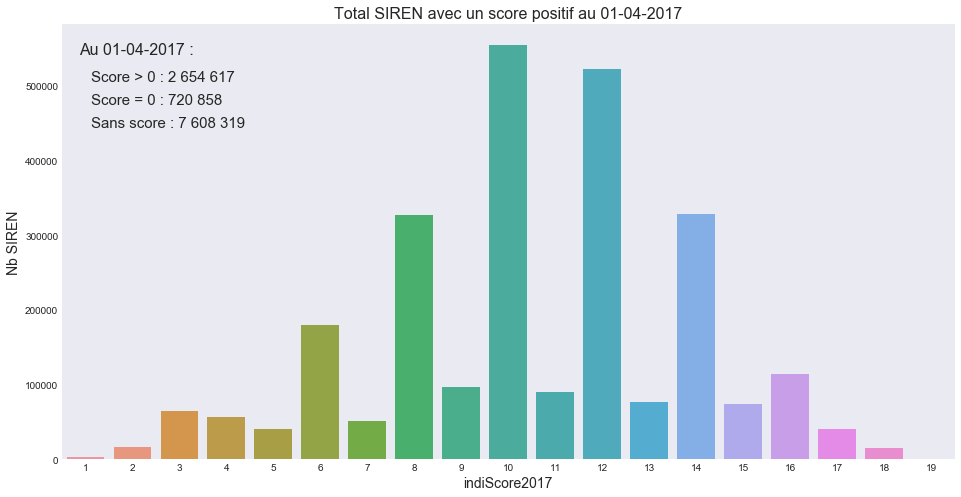

154 902 Total SIREN avec un score positif au 01-04-2017 et un score à 0 au 01-04-2018 (hors absorption)


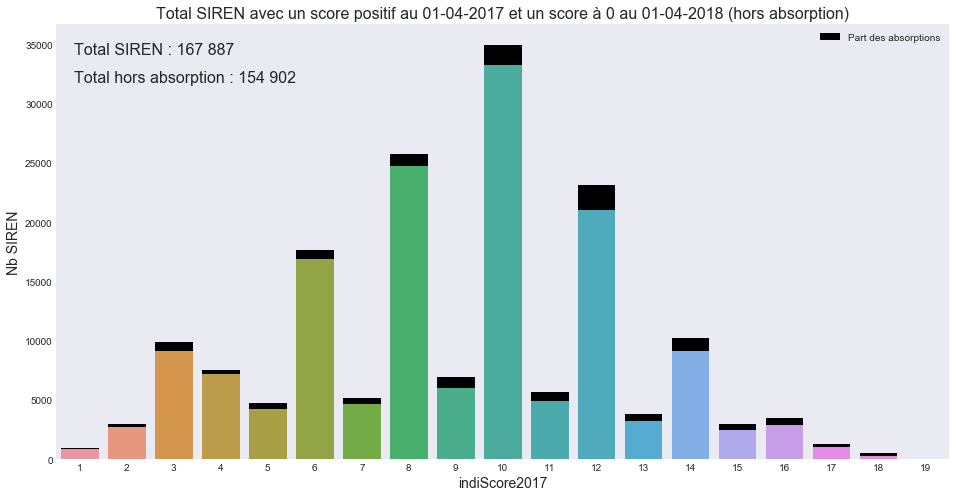

,indiScore2017,siren,Nb défauts,pourcent,Absorptions,pourcentabs
0,1,3116,904,29.01,925,29.69
1,2,16845,2701,16.03,2951,17.52
2,3,64501,9161,14.20,9939,15.41
3,4,56751,7165,12.63,7542,13.29
4,5,41175,4243,10.30,4724,11.47
5,6,179616,16898,9.41,17700,9.85
6,7,51525,4658,9.04,5164,10.02
7,8,327329,24785,7.57,25783,7.88
8,9,96951,6054,6.24,6944,7.16
9,10,554608,33268,6.00,34952,6.30


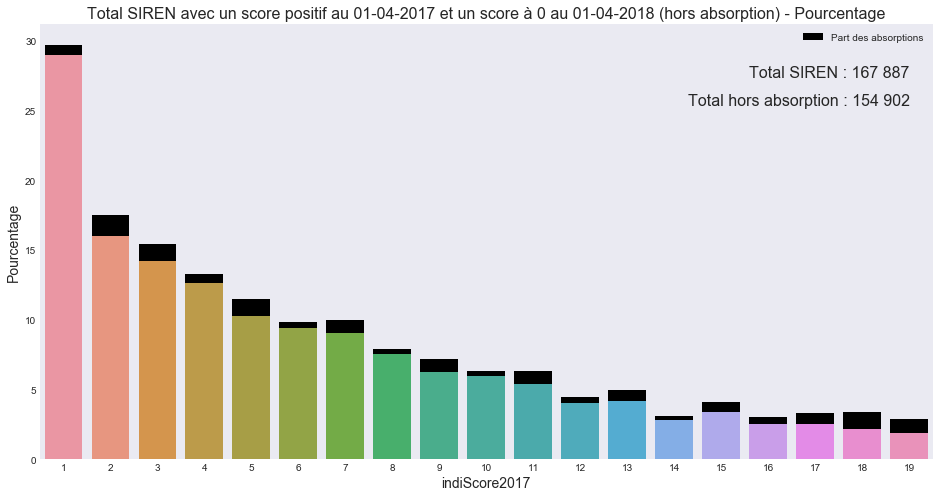

SIREN passés de 19 à 0 :
303494181,344397039,351576970,380414946,408255560,413952474,414660043,419752522,420511990,435037981,435782834,443457726,443736483,458505625,488842279,552137283,775604853,801075714
SIREN passés de 18 à 0 :
37021151,258100494,270100019,279400048,279400162,304043847,304392525,309231504,309872653,310190129,310718671,312056641,312801079,313052664,314708298,316680032,319466447,319537742,319626305,320975188,321190365,321618241,321814121,322214669,322911439,323109975,323722140,324593326,326613429,326860202,326889136,326943321,327832739,328936646,329032833,329667034,329804595,329829295,329937924,330055724,331748046,331749960,332181320,332461342,332683408,332900471,333461911,337679476,337687602,337866487,338226400,338377617,338656507,338839103,339189904,339707184,339727471,339883555,340335223,340526268,341242295,341687754,342383536,343121588,343451944,343518965,343888285,343981742,344071451,344508320,344571559,345355499,347475519,348118555,348724527,349073841,349152504,3

In [104]:
# On travaille sur les SIREN positifs 1 an avant
make_stats(df, 0)

1 211 807 Total SIREN avec un score positif au 01-04-2016
341 904 SIREN avec un score à 0 au 01-04-2016
9 430 083 SIREN sans score au 01-04-2016


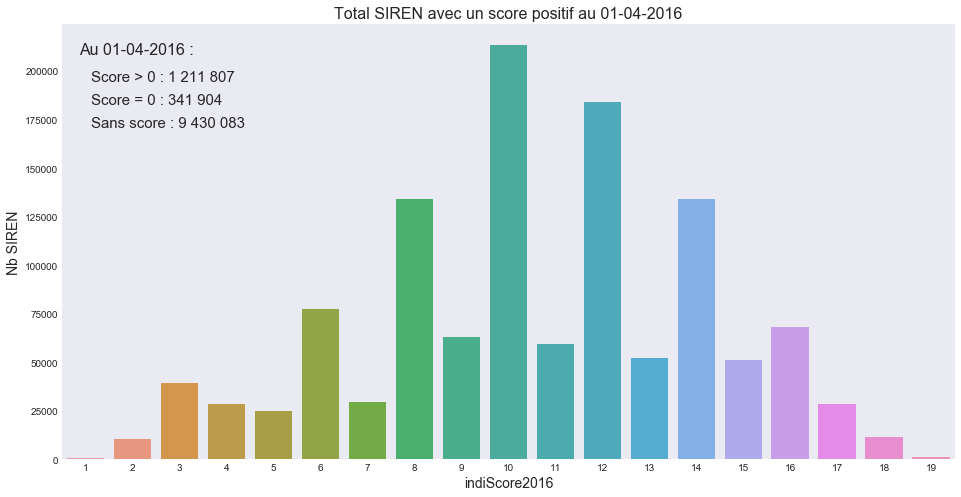

45 022 Total SIREN avec un score positif au 01-04-2016 et un score à 0 au 01-04-2017 (hors absorption)


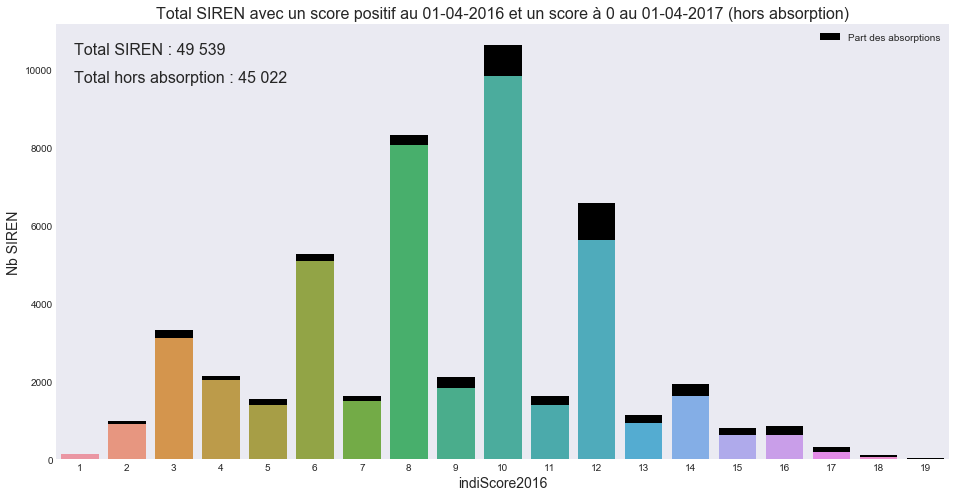

,indiScore2016,siren,Nb défauts,pourcent,Absorptions,pourcentabs
0,1,885,147,16.61,149,16.84
1,2,10412,918,8.82,978,9.39
2,3,39248,3104,7.91,3317,8.45
3,4,28485,2028,7.12,2135,7.50
4,5,25027,1383,5.53,1537,6.14
5,6,77238,5085,6.58,5282,6.84
6,7,29337,1494,5.09,1626,5.54
7,8,134098,8076,6.02,8337,6.22
8,9,62939,1821,2.89,2102,3.34
9,10,213391,9845,4.61,10642,4.99


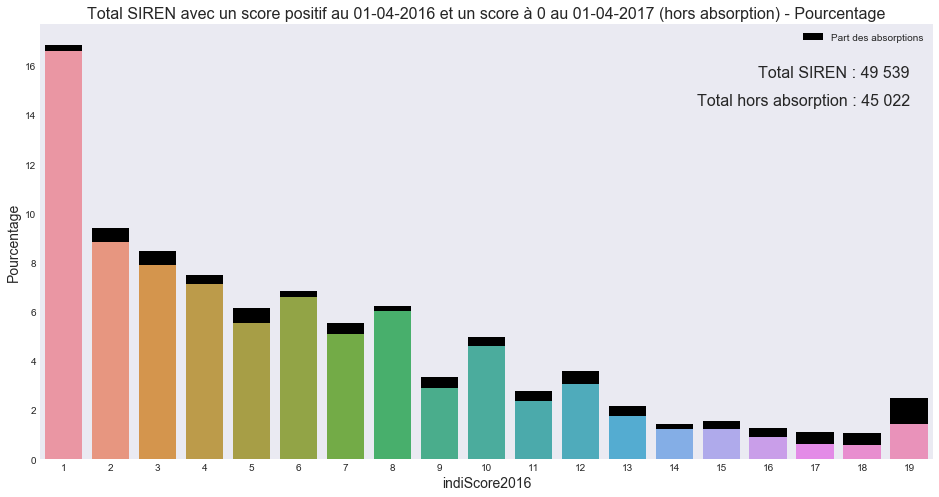

In [105]:
make_stats(df, 1)

698 434 Total SIREN avec un score positif au 01-04-2015
260 602 SIREN avec un score à 0 au 01-04-2015
10 024 758 SIREN sans score au 01-04-2015


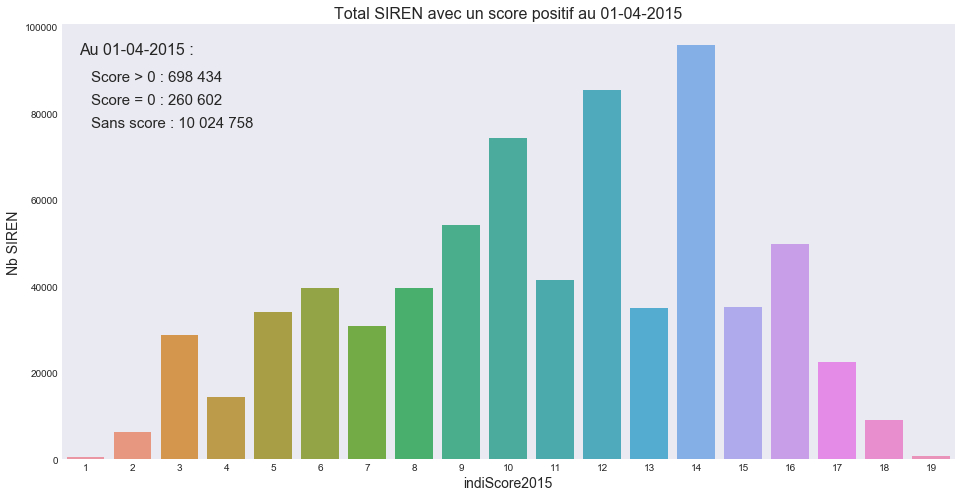

34 106 Total SIREN avec un score positif au 01-04-2015 et un score à 0 au 01-04-2016 (hors absorption)


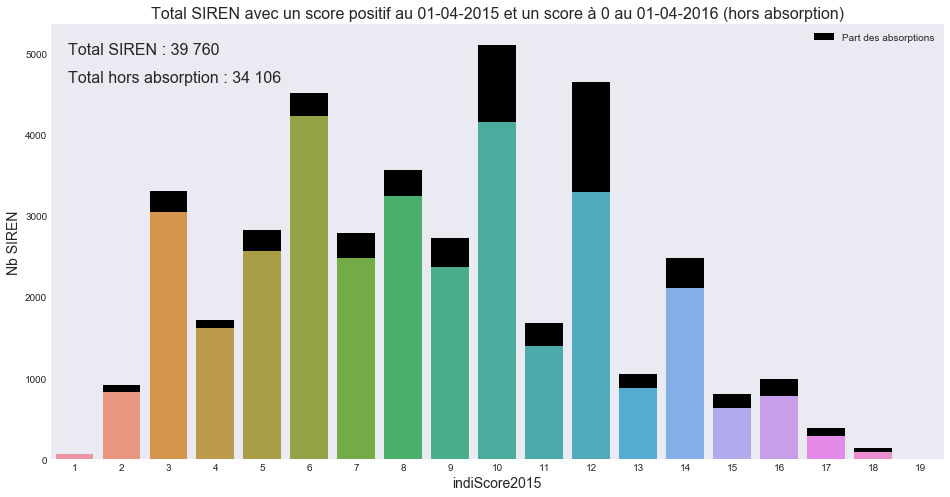

,indiScore2015,siren,Nb défauts,pourcent,Absorptions,pourcentabs
0,1,445,66,14.83,66,14.83
1,2,6394,836,13.07,914,14.29
2,3,28872,3052,10.57,3315,11.48
3,4,14501,1614,11.13,1721,11.87
4,5,34102,2564,7.52,2831,8.30
5,6,39583,4229,10.68,4521,11.42
6,7,30941,2487,8.04,2787,9.01
7,8,39538,3244,8.20,3564,9.01
8,9,54313,2375,4.37,2734,5.03
9,10,74444,4159,5.59,5108,6.86


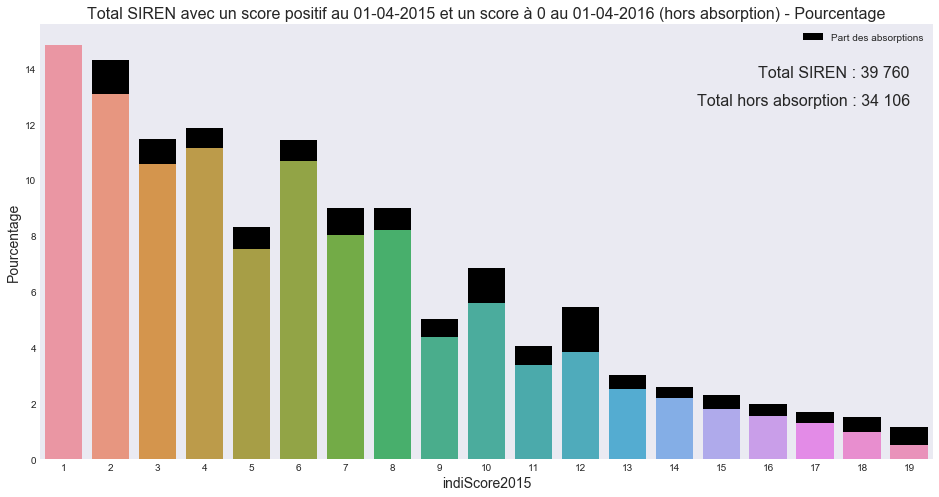

In [106]:
make_stats(df, 2)

552 411 Total SIREN avec un score positif au 01-04-2014
200 007 SIREN avec un score à 0 au 01-04-2014
10 231 376 SIREN sans score au 01-04-2014


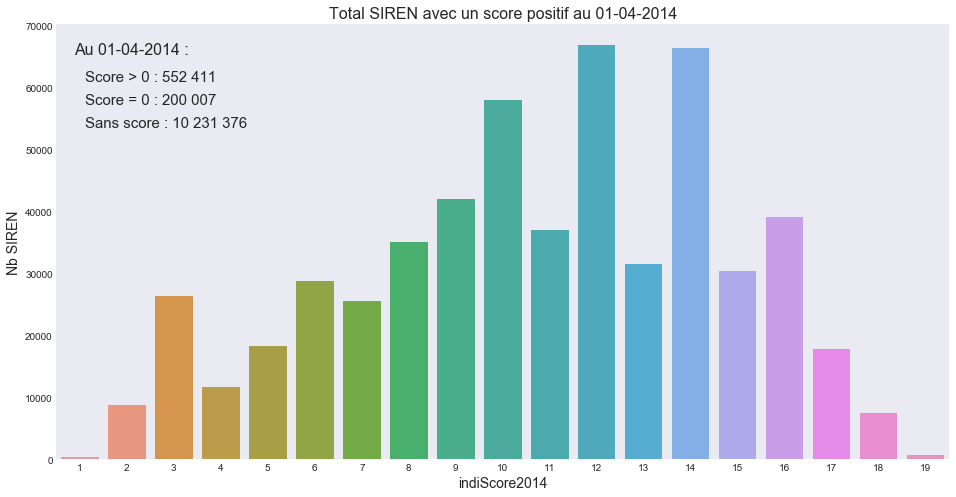

25 962 Total SIREN avec un score positif au 01-04-2014 et un score à 0 au 01-04-2015 (hors absorption)


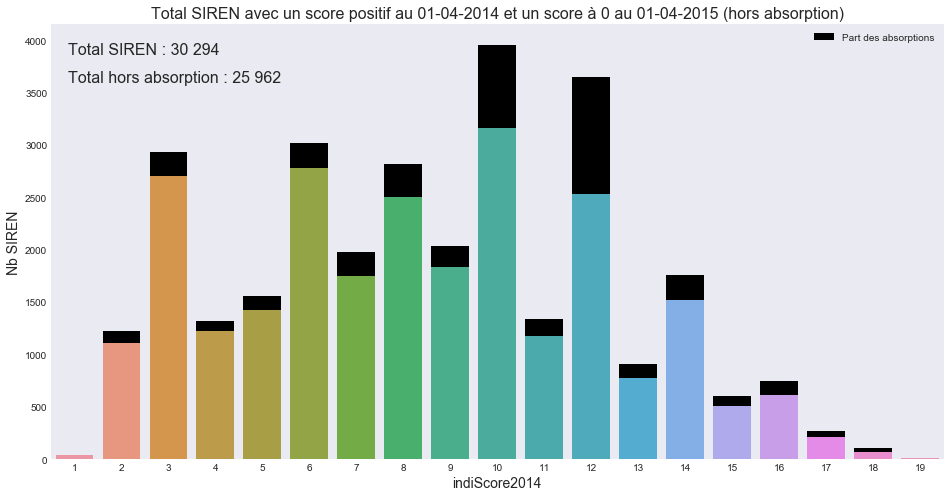

,indiScore2014,siren,Nb défauts,pourcent,Absorptions,pourcentabs
0,1,416,38,9.13,40,9.62
1,2,8846,1110,12.55,1229,13.89
2,3,26436,2706,10.24,2934,11.10
3,4,11629,1220,10.49,1320,11.35
4,5,18291,1429,7.81,1563,8.55
5,6,28811,2785,9.67,3015,10.46
6,7,25614,1749,6.83,1976,7.71
7,8,35075,2503,7.14,2819,8.04
8,9,41994,1832,4.36,2036,4.85
9,10,58009,3161,5.45,3953,6.81


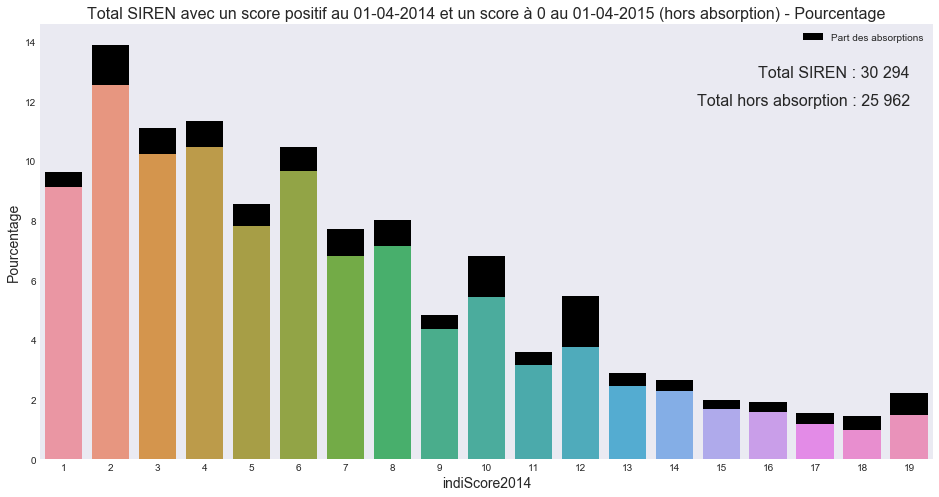

In [107]:
make_stats(df, 3)

1 211 807 Total SIREN avec un score positif au 01-04-2016
341 904 SIREN avec un score à 0 au 01-04-2016
9 430 083 SIREN sans score au 01-04-2016
113 670 Total SIREN avec un score positif au 01-04-2016 et un score à 0 au 01-04-2018 (hors absorption)


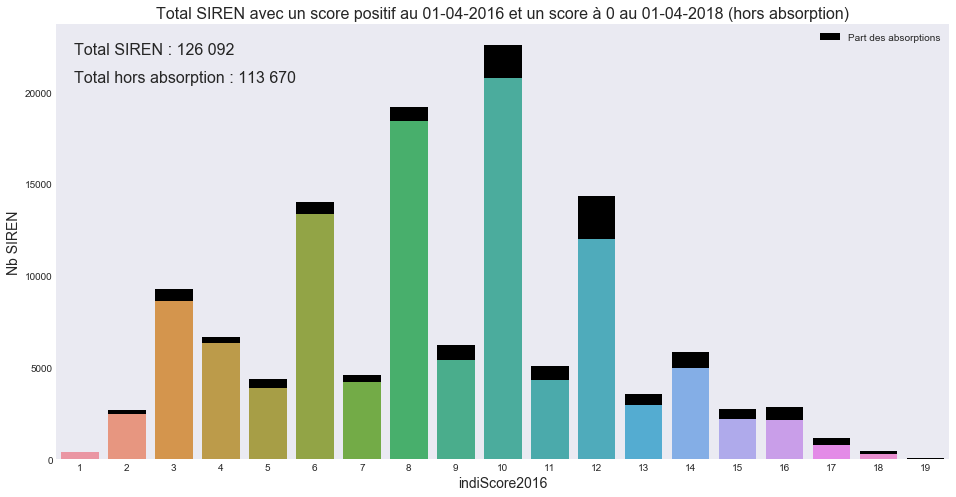

,indiScore2016,siren,Nb défauts,pourcent,Absorptions,pourcentabs
0,1,885,399,45.08,401,45.31
1,2,10412,2492,23.93,2683,25.77
2,3,39248,8618,21.96,9276,23.63
3,4,28485,6358,22.32,6651,23.35
4,5,25027,3900,15.58,4356,17.41
5,6,77238,13384,17.33,13999,18.12
6,7,29337,4192,14.29,4615,15.73
7,8,134098,18461,13.77,19214,14.33
8,9,62939,5396,8.57,6253,9.94
9,10,213391,20760,9.73,22568,10.58


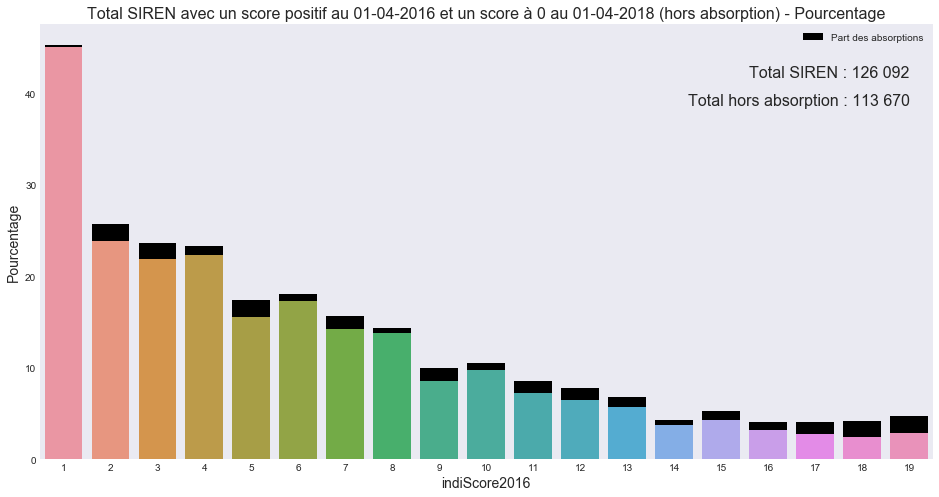

In [108]:
# On travaille sur les SIREN positifs 2 ans avant
make_stats(df, 0, 2)

698 434 Total SIREN avec un score positif au 01-04-2015
260 602 SIREN avec un score à 0 au 01-04-2015
10 024 758 SIREN sans score au 01-04-2015
74 173 Total SIREN avec un score positif au 01-04-2015 et un score à 0 au 01-04-2018 (hors absorption)


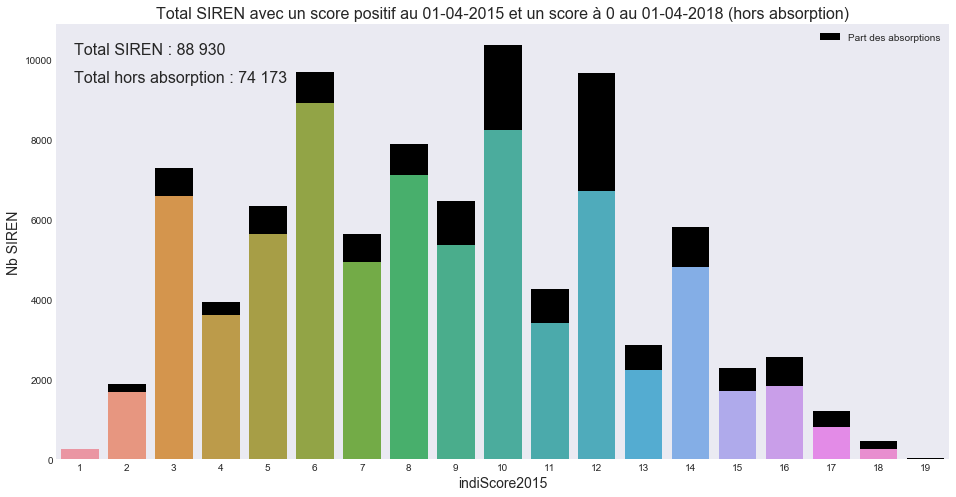

,indiScore2015,siren,Nb défauts,pourcent,Absorptions,pourcentabs
0,1,445,253,56.85,256,57.53
1,2,6394,1697,26.54,1892,29.59
2,3,28872,6580,22.79,7288,25.24
3,4,14501,3610,24.89,3935,27.14
4,5,34102,5647,16.56,6347,18.61
5,6,39583,8915,22.52,9703,24.51
6,7,30941,4930,15.93,5645,18.24
7,8,39538,7111,17.99,7899,19.98
8,9,54313,5371,9.89,6478,11.93
9,10,74444,8254,11.09,10370,13.93


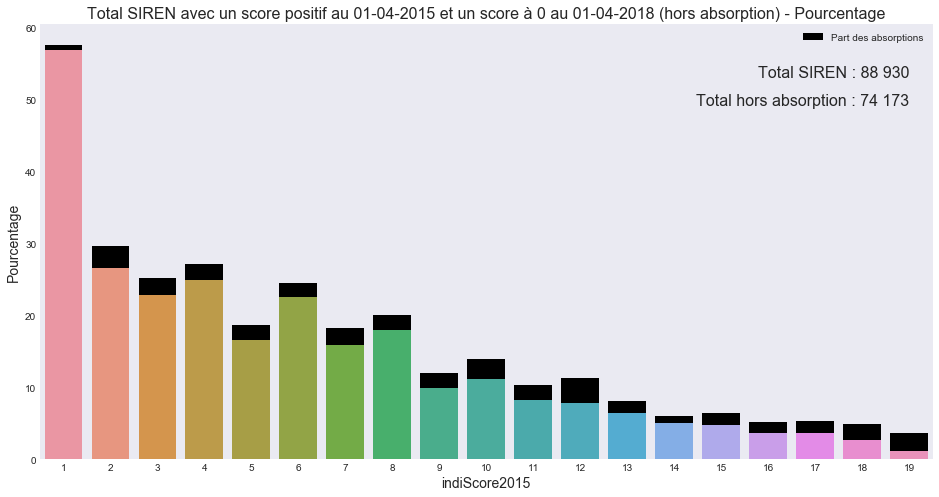

In [109]:
# On travaille sur les SIREN positifs 3 ans avant
make_stats(df, 0, 3)